# 📎 CIFAR-10 Datasets with TensorFlow

## CNN

### Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from matplotlib.gridspec import GridSpec

# 1. Load and preprocess the CIFAR-10 dataset
print("Loading and preprocessing CIFAR-10 dataset...")

# CIFAR-10 class names for reference
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


Loading and preprocessing CIFAR-10 dataset...


### Datasets

In [3]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train_categorical.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test_categorical.shape}")

# 2. Define a simple CNN architecture
print("\nBuilding the CNN model...")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 123s 1us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)

Building the CNN model...


### Model

In [4]:
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Display model summary
model.summary()

# 3. Compile the model
print("\nCompiling the model...")
model.compile(
    optimizer='adam',  # Adam optimizer with default learning rate
    loss='categorical_crossentropy',  # Standard for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# 4. Set up callbacks for early stopping and model checkpointing
print("\nSetting up callbacks...")
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)


Compiling the model...

Setting up callbacks...


### Training

In [5]:
# 5. Train the model
print("\nTraining the model...")
history = model.fit(
    X_train, y_train_categorical,
    epochs=30,
    batch_size=64,
    validation_split=0.2,  # Use 20% of training data for validation
    callbacks=[early_stopping],
    verbose=1
)


Training the model...
Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.4044 - loss: 1.9230 - val_accuracy: 0.5776 - val_loss: 1.1918
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6183 - loss: 1.0876 - val_accuracy: 0.6947 - val_loss: 0.8723
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6827 - loss: 0.8975 - val_accuracy: 0.7133 - val_loss: 0.8295
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7142 - loss: 0.8089 - val_accuracy: 0.7394 - val_loss: 0.7545
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7401 - loss: 0.7400 - val_accuracy: 0.7566 - val_loss: 0.7046
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7635 - loss: 0.6680 - val_accuracy: 0.7722 - val_loss: 0.6733
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7824 - loss: 0.6176 - val_accuracy: 0.7612 - val_loss: 0.6917
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8027 - lo

### Evaluation


Evaluating the model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8010 - loss: 0.6193
Test accuracy: 0.7996
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Calculating detailed evaluation metrics...

Class-wise performance metrics:
        Class  Precision  Recall  F1 Score
0    airplane   0.812314   0.818  0.815147
1  automobile   0.871940   0.926  0.898157
2        bird   0.756937   0.682  0.717517
3         cat   0.615668   0.668  0.640767
4        deer   0.766467   0.768  0.767233
5         dog   0.753639   0.673  0.711041
6        frog   0.823026   0.865  0.843491
7       horse   0.807306   0.884  0.843914
8        ship   0.884965   0.877  0.880964
9       truck   0.914567   0.835  0.872974

Overall performance metrics:
Accuracy: 0.7996
Weighted Precision: 0.8007
Weighted Recall: 0.7996
Weighted F1 Score: 0.7991

Computing ROC curves and AUC values...


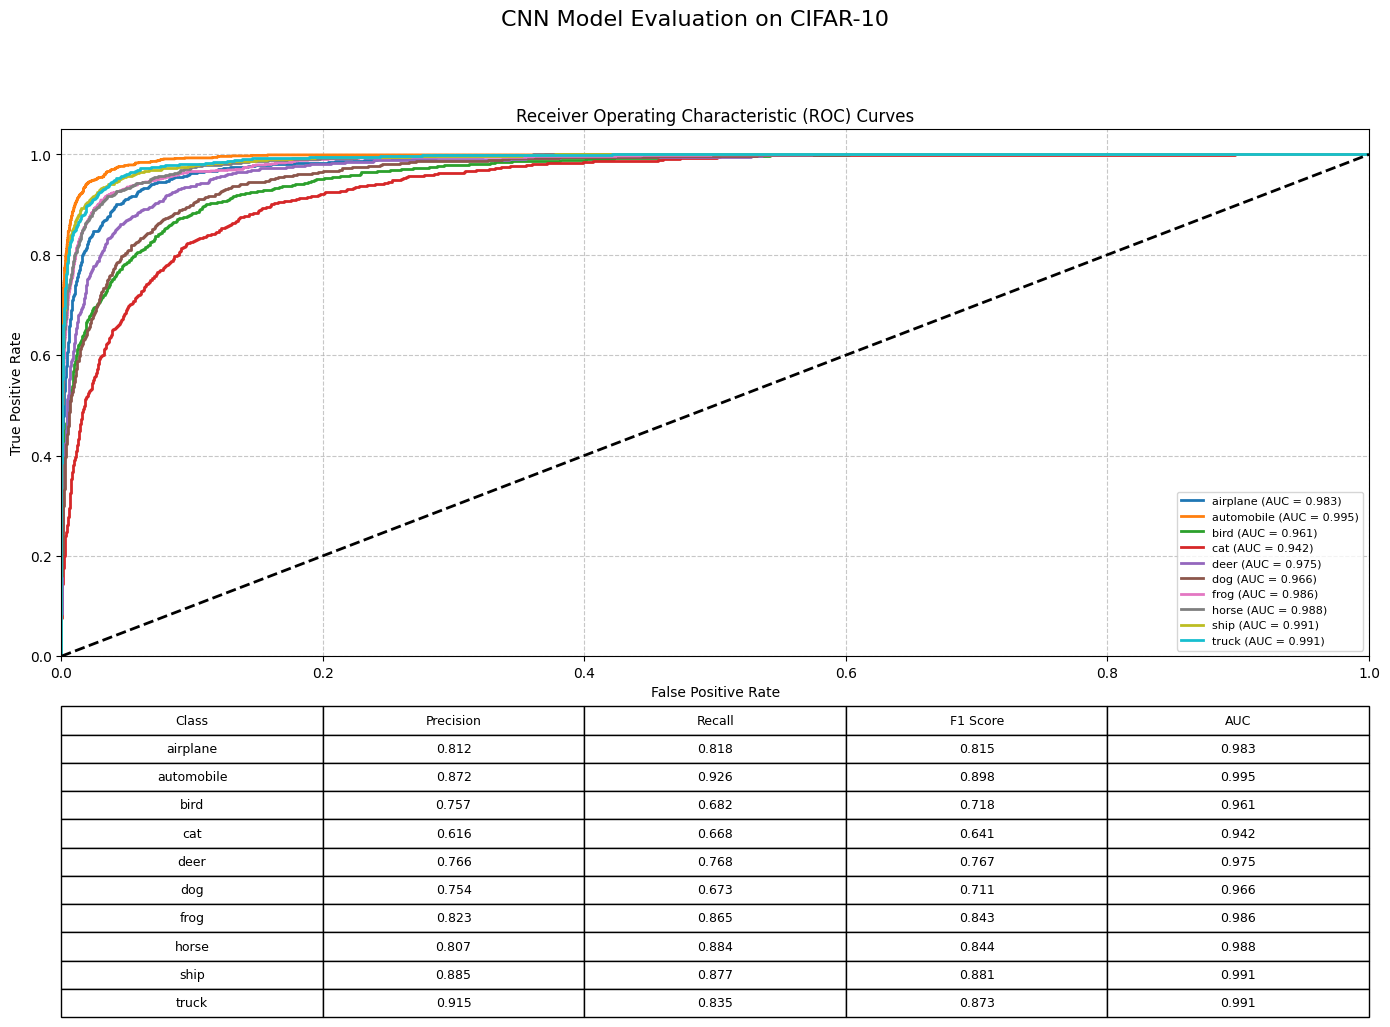

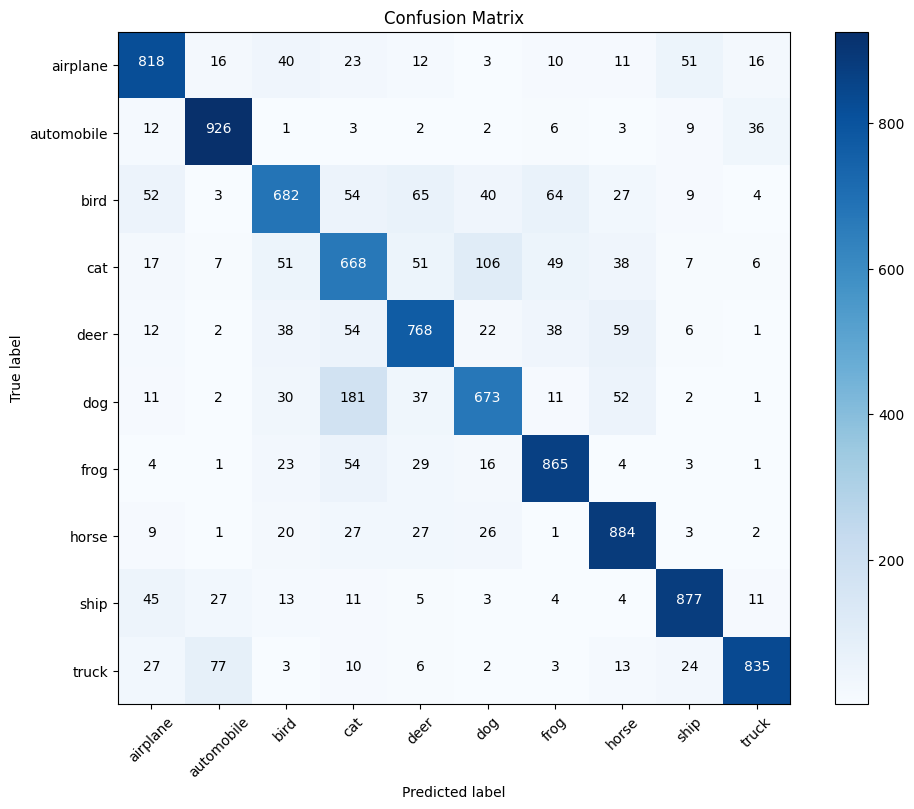

Evaluation completed and visualizations saved!


In [6]:
# 6. Evaluate the model on test data
print("\nEvaluating the model...")
test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=1)
print(f"Test accuracy: {test_acc:.4f}")

# Generate predictions for test data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_flat = np.argmax(y_test_categorical, axis=1)

# 7. Calculate evaluation metrics
print("\nCalculating detailed evaluation metrics...")

# Precision, recall, and F1-score for each class
precision = precision_score(y_test_flat, y_pred, average=None)
recall = recall_score(y_test_flat, y_pred, average=None)
f1 = f1_score(y_test_flat, y_pred, average=None)

# Weighted average metrics
precision_avg = precision_score(y_test_flat, y_pred, average='weighted')
recall_avg = recall_score(y_test_flat, y_pred, average='weighted')
f1_avg = f1_score(y_test_flat, y_pred, average='weighted')

# Create a DataFrame for class-wise metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

print("\nClass-wise performance metrics:")
print(metrics_df)

print("\nOverall performance metrics:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Weighted Precision: {precision_avg:.4f}")
print(f"Weighted Recall: {recall_avg:.4f}")
print(f"Weighted F1 Score: {f1_avg:.4f}")

# 8. Compute ROC curve and AUC for each class
print("\nComputing ROC curves and AUC values...")

# Set up the figure for ROC curves and metrics visualization
plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, height_ratios=[2, 1])

# Plot for ROC curves
ax1 = plt.subplot(gs[0, :])
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Calculate ROC curve and AUC for each class
roc_auc = {}
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.3f})')

# Add the random classifier line
ax1.plot([0, 1], [0, 1], 'k--', lw=2)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curves')
ax1.legend(loc="lower right", fontsize=8)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot for metrics table
ax2 = plt.subplot(gs[1, :])
ax2.axis('off')

# Create metrics table
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score'],
    'Value': [f"{test_acc:.4f}", f"{precision_avg:.4f}", f"{recall_avg:.4f}", f"{f1_avg:.4f}"]
})

# Create a table with class-wise metrics
cell_text = []
for i in range(len(class_names)):
    cell_text.append([class_names[i], f"{precision[i]:.3f}", f"{recall[i]:.3f}", f"{f1[i]:.3f}", f"{roc_auc[i]:.3f}"])

tbl = ax2.table(cellText=cell_text,
                colLabels=['Class', 'Precision', 'Recall', 'F1 Score', 'AUC'],
                cellLoc='center',
                loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1, 1.5)

plt.tight_layout()
plt.suptitle('CNN Model Evaluation on CIFAR-10', fontsize=16, y=1.02)
plt.subplots_adjust(top=0.9)

# Save the figure
plt.savefig('cnn_cifar10_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

# Display confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_flat, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add text annotations to the confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Evaluation completed and visualizations saved!")

## MLP

### Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from matplotlib.gridspec import GridSpec

# 1. Load and preprocess the CIFAR-10 dataset
print("Loading and preprocessing CIFAR-10 dataset...")

# CIFAR-10 class names for reference
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Loading and preprocessing CIFAR-10 dataset...


### Datasets

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten the images for MLP input
# MLP requires 1D input (unlike CNN which can take 2D images directly)
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten 32x32x3 to 3072
X_test_flat = X_test.reshape(X_test.shape[0], -1)     # Flatten 32x32x3 to 3072

# Normalize pixel values to be between 0 and 1
X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"Training data shape: {X_train_flat.shape}")
print(f"Training labels shape: {y_train_categorical.shape}")
print(f"Test data shape: {X_test_flat.shape}")
print(f"Test labels shape: {y_test_categorical.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 3072)
Training labels shape: (50000, 10)
Test data shape: (10000, 3072)
Test labels shape: (10000, 10)


### Model

In [3]:
# 2. Define a simple MLP architecture
print("\nBuilding the MLP model...")

model = models.Sequential([
    # Input layer - just specifies the input shape
    layers.Input(shape=(3072,)),  # 32x32x3 = 3072

    # First hidden layer
    layers.Dense(1024, activation='relu'),  # Relatively large layer to capture image patterns
    layers.BatchNormalization(),            # Normalize activations for faster training
    layers.Dropout(0.5),                    # High dropout rate to combat overfitting

    # Second hidden layer
    layers.Dense(512, activation='relu'),   # Decrease size as we go deeper
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    # Third hidden layer
    layers.Dense(256, activation='relu'),   # Further decrease size
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Output layer
    layers.Dense(10, activation='softmax')  # 10 classes with softmax activation
])

# Display model summary
model.summary()

# 3. Compile the model
print("\nCompiling the model...")

# Set learning rate for Adam optimizer
initial_learning_rate = 0.001

# Learning rate scheduler - reduce learning rate when training plateaus
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 10))

# Adam optimizer with learning rate scheduler
optimizer = optimizers.Adam(learning_rate=initial_learning_rate)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',  # Standard for multi-class classification
    metrics=['accuracy']             # Track accuracy during training
)

# 4. Set up callbacks for early stopping and learning rate scheduling
print("\nSetting up callbacks...")

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=12,               # Wait for 12 epochs without improvement
    restore_best_weights=True, # Restore weights from best epoch
    verbose=1
)

lr_scheduler = callbacks.LearningRateScheduler(lr_schedule, verbose=1)



Building the MLP model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,812,618 (14.54 MB)

 Trainable params: 3,809,034 (14.53 MB)

 Non-trainable params: 3,584 (14.00 KB)


Compiling the model...

Setting up callbacks...


### Training

In [4]:
# 5. Train the model
print("\nTraining the model...")
history = model.fit(
    X_train_flat, y_train_categorical,
    epochs=50,               # Maximum number of epochs
    batch_size=128,          # Larger batch size for MLP compared to CNN
    validation_split=0.2,    # Use 20% of training data for validation
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# 6. Evaluate the model on test data
print("\nEvaluating the model...")
test_loss, test_acc = model.evaluate(X_test_flat, y_test_categorical, verbose=1)
print(f"Test accuracy: {test_acc:.4f}")

# Generate predictions for test data
y_pred_prob = model.predict(X_test_flat)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_flat = np.argmax(y_test_categorical, axis=1)



Training the model...

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 96ms/step - accuracy: 0.2472 - loss: 2.3461 - val_accuracy: 0.3401 - val_loss: 1.8561 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.3535 - loss: 1.8167 - val_accuracy: 0.3733 - val_loss: 1.7396 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.3895 - loss: 1.6981 - val_accuracy: 0.3755 - val_loss: 1.7501 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.4030 - loss: 1.6654 - val_accuracy: 0.3969 - val_loss: 1.7152 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 

### Evaluation


Calculating detailed evaluation metrics...

Class-wise performance metrics:
        Class  Precision  Recall  F1 Score
0    airplane   0.557576   0.552  0.554774
1  automobile   0.638275   0.607  0.622245
2        bird   0.376734   0.353  0.364481
3         cat   0.357047   0.266  0.304871
4        deer   0.439216   0.448  0.443564
5         dog   0.462380   0.338  0.390526
6        frog   0.432397   0.662  0.523113
7       horse   0.559799   0.557  0.558396
8        ship   0.560422   0.691  0.618898
9       truck   0.599769   0.520  0.557043

Overall performance metrics:
Accuracy: 0.4994
Weighted Precision: 0.4984
Weighted Recall: 0.4994
Weighted F1 Score: 0.4938

Computing ROC curves and AUC values...


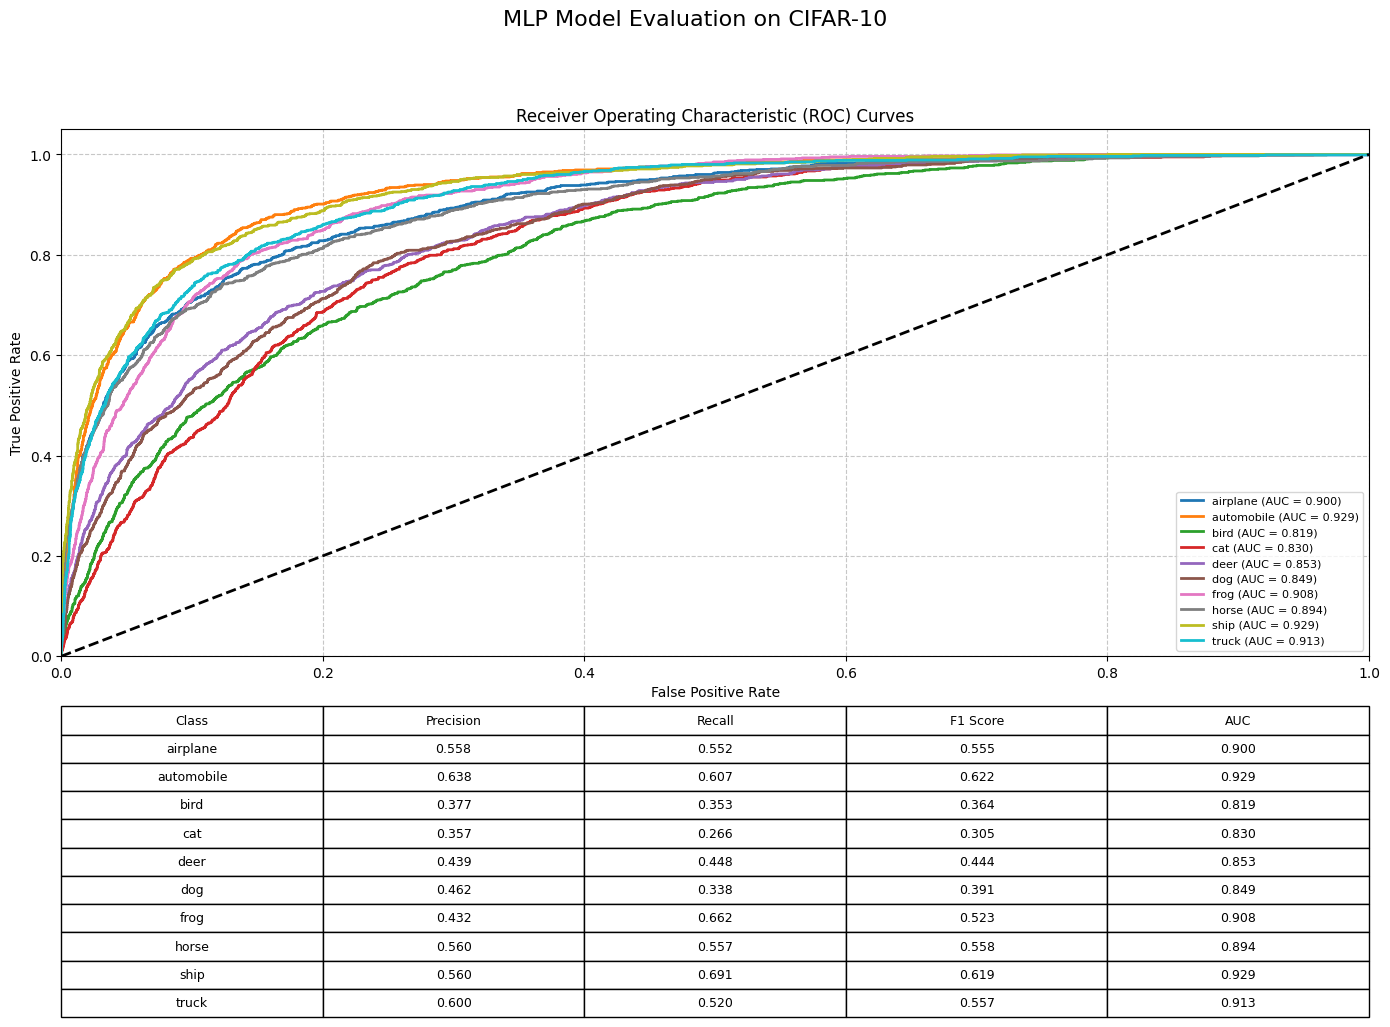

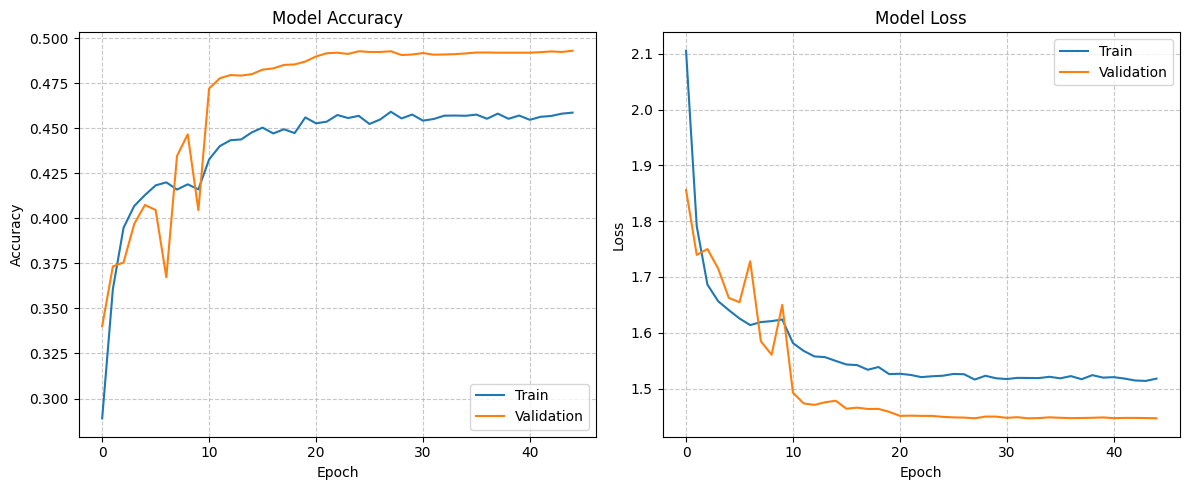

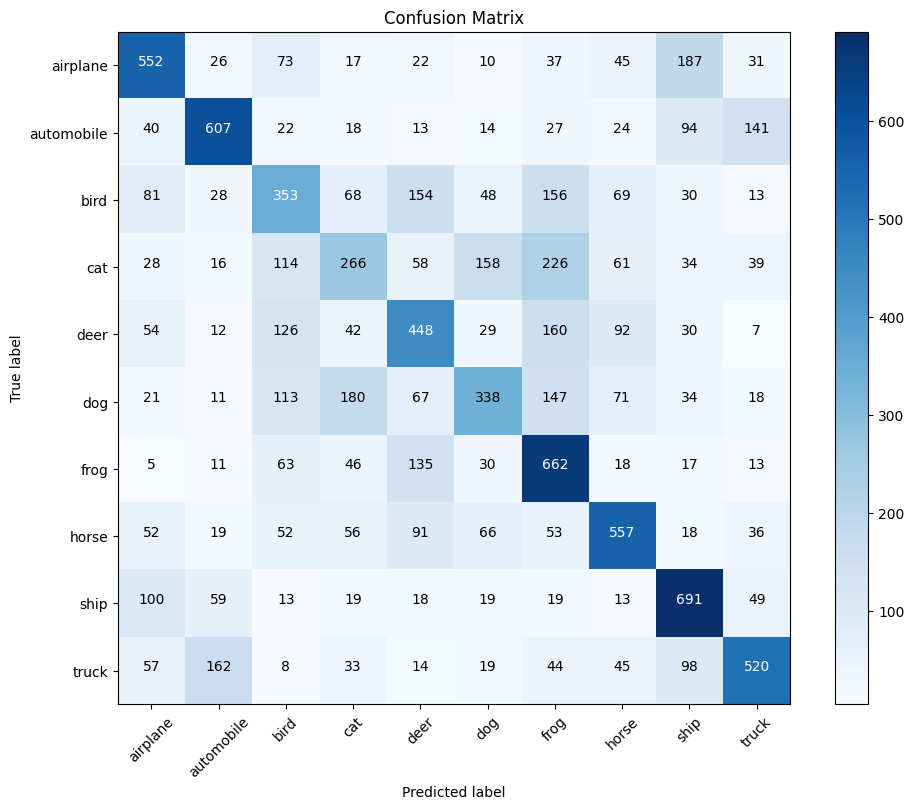

Evaluation completed and visualizations saved!


In [5]:
# 7. Calculate evaluation metrics
print("\nCalculating detailed evaluation metrics...")

# Precision, recall, and F1-score for each class
precision = precision_score(y_test_flat, y_pred, average=None)
recall = recall_score(y_test_flat, y_pred, average=None)
f1 = f1_score(y_test_flat, y_pred, average=None)

# Weighted average metrics
precision_avg = precision_score(y_test_flat, y_pred, average='weighted')
recall_avg = recall_score(y_test_flat, y_pred, average='weighted')
f1_avg = f1_score(y_test_flat, y_pred, average='weighted')

# Create a DataFrame for class-wise metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

print("\nClass-wise performance metrics:")
print(metrics_df)

print("\nOverall performance metrics:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Weighted Precision: {precision_avg:.4f}")
print(f"Weighted Recall: {recall_avg:.4f}")
print(f"Weighted F1 Score: {f1_avg:.4f}")

# 8. Compute ROC curve and AUC for each class
print("\nComputing ROC curves and AUC values...")

# Set up the figure for ROC curves and metrics visualization
plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, height_ratios=[2, 1])

# Plot for ROC curves
ax1 = plt.subplot(gs[0, :])
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Calculate ROC curve and AUC for each class
roc_auc = {}
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.3f})')

# Add the random classifier line
ax1.plot([0, 1], [0, 1], 'k--', lw=2)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curves')
ax1.legend(loc="lower right", fontsize=8)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot for metrics table
ax2 = plt.subplot(gs[1, :])
ax2.axis('off')

# Create metrics table
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score'],
    'Value': [f"{test_acc:.4f}", f"{precision_avg:.4f}", f"{recall_avg:.4f}", f"{f1_avg:.4f}"]
})

# Create a table with class-wise metrics
cell_text = []
for i in range(len(class_names)):
    cell_text.append([class_names[i], f"{precision[i]:.3f}", f"{recall[i]:.3f}", f"{f1[i]:.3f}", f"{roc_auc[i]:.3f}"])

tbl = ax2.table(cellText=cell_text,
                colLabels=['Class', 'Precision', 'Recall', 'F1 Score', 'AUC'],
                cellLoc='center',
                loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1, 1.5)

plt.tight_layout()
plt.suptitle('MLP Model Evaluation on CIFAR-10', fontsize=16, y=1.02)
plt.subplots_adjust(top=0.9)

# Save the figure
plt.savefig('mlp_cifar10_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

# Display training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('mlp_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Display confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_flat, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add text annotations to the confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('mlp_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Evaluation completed and visualizations saved!")